### 2373, Андреев Никита

##### В качестве атрибута классификации выберем признак **fuel_type**, т.к. он наиболее сбалансирован:

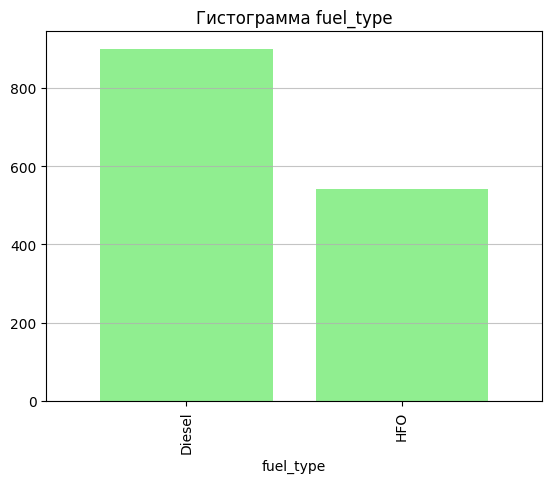

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("ship_fuel_efficiency.csv")
df['fuel_type'].value_counts().plot(kind='bar', width=0.8, color='lightgreen')
plt.title(f'Гистограмма {'fuel_type'}')
plt.grid(axis='y', alpha=0.75)
plt.show()
df.head()

In [7]:
df = df.drop(columns='ship_id', axis=1)
categorical_features = ['route_id', 'ship_type', 'fuel_type', 'weather_conditions', 'month']
numerical_features = ['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency', 'CO2_per_km']

def categorical_to_numerical_process(dataframe, column):
    
    def convert_to_index(value, uniq_values):
        return uniq_values.index(value)
        
    lists_uniq_values = sorted(list(set(dataframe[column])))
    dataframe[column] = dataframe[column].apply(lambda x: convert_to_index(x, lists_uniq_values))
    
for feature in categorical_features:
    categorical_to_numerical_process(df, feature)

df.head()

,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,1,3,4,132.26,1,3779.77,10625.76,2,92.14
1,1,2,3,128.52,1,4461.44,12779.73,1,92.98
2,1,2,7,67.30,1,1867.73,5353.01,0,87.61
3,1,2,0,71.68,0,2393.51,6506.52,2,87.42
4,1,1,8,134.32,1,4267.19,11617.03,0,85.61


#### Разделим данных на обучающую и тестовую выборку:

In [8]:
target = df['fuel_type']
df = df.drop('fuel_type', axis=1)

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42, stratify=target)

### kNN:

In [9]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
predictions_knn = model_knn.predict(x_test)

accuracy = accuracy_score(y_test, predictions_knn)
precision = precision_score(y_test, predictions_knn, average='weighted')
recall = recall_score(y_test, predictions_knn, average='weighted')
f1 = f1_score(y_test, predictions_knn, average='weighted')

y_pred = model_knn.predict(x_test)
y_pred_proba = model_knn.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

print(f'Accuracy: {accuracy:.2f} \nPrecision: {precision:.2f} \nRecall: {recall:.2f} \
      \nF1 Score: {f1:.2f} \nROC: {roc_auc:.2f}')


Accuracy: 0.64 
Precision: 0.63 
Recall: 0.64       
F1 Score: 0.63 
ROC: 0.60


### Дерево решений:

In [10]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
predictions_tree = model_tree.predict(x_test)
accuracy = accuracy_score(y_test, predictions_tree)
precision = precision_score(y_test, predictions_tree, average='weighted')
recall = recall_score(y_test, predictions_tree, average='weighted')
f1 = f1_score(y_test, predictions_tree, average='weighted')

y_pred = model_tree.predict(x_test)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

print(f'Accuracy: {accuracy:.2f} \nPrecision: {precision:.2f} \nRecall: {recall:.2f} \
      \nF1 Score: {f1:.2f} \nROC: {roc_auc:.2f}')

Accuracy: 0.57 
Precision: 0.57 
Recall: 0.57       
F1 Score: 0.57 
ROC: 0.54


## Вывод
Aлгоритм kNN показывает немного лучшие значения точности (Accuracy) и полноты (Recall) по сравнению с деревом решений.
Однако значения F1-меры и Precision ниже, что может указывать на более высокую чувствительность модели к дисбалансу классов.

Алгоритм Decision Tree даёт более стабильные результаты, так как все метрики имеют одинаковое значение.
Это указывает на то, что модель принимает более сбалансированные решения, но, в целом, ее качество ниже.